# Testing

---
Stuff that i dont want to confuse in the Main

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import random
import os

import torch

In [2]:
import sys
ROOT_PATH = Path("..")  
sys.path.append(str(ROOT_PATH))
from src.dataloaders import get_dataloaders
from src.model import EfficientNetSpectrogram
from src.model import BaselineCNN

In [3]:
AUDIO_DIR = ROOT_PATH / "Data" / "Audio"
ANNOT_DIR = ROOT_PATH / "Data" / "Annotations"
SPECT_DIR = ROOT_PATH / "Data" / "Spectrograms"

ANNOT_FILE = ANNOT_DIR / "audio_annotations.csv"

train_df = pd.read_csv(ANNOT_DIR / "train.csv")
val_df   = pd.read_csv(ANNOT_DIR / "val.csv")
test_df  = pd.read_csv(ANNOT_DIR / "test.csv")

## Code

Fin_FinbackWhale ---  shape: (1, 128, 3470)
HumpbackWhale ---  shape: (1, 128, 2440)
SpermWhale ---  shape: (1, 128, 10)


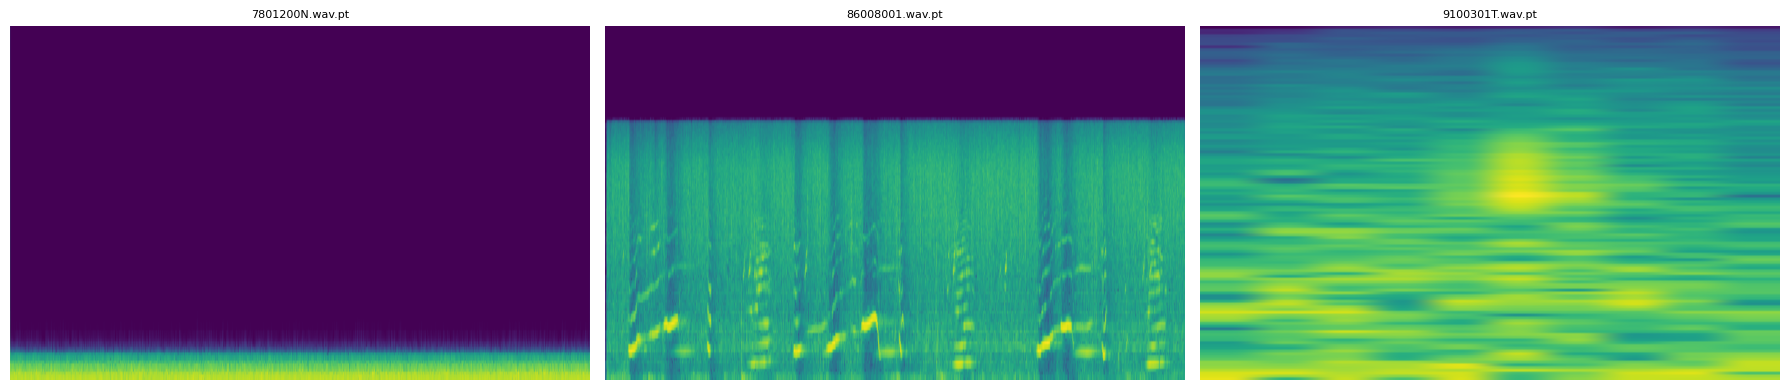

In [4]:
base_dir = ROOT_PATH / "Data" / "Spectrograms" / "train"

all_files = []
for root, dirs, files in os.walk(base_dir):
    for f in files:
        if f.endswith(".pt"):
            relative_path = os.path.join(root, f)
            all_files.append(relative_path)

if len(all_files) < 3:
    raise ValueError("Not enough .pt files found.")

# Select 3 random spectrograms
samples = random.sample(all_files, 3)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for ax, path in zip(axes, samples):
    tensor = torch.load(path)

    species_name = os.path.basename(os.path.dirname(path))
    # Print the tensor shape and name
    print(f"{species_name} ---  shape: {tuple(tensor.shape)}")

    # Convert tensor to 2D for plotting
    if tensor.dim() == 2:
        img = tensor
    elif tensor.dim() == 3:
        # assume [C, H, W]
        img = tensor[0]  
    else:
        raise ValueError(f"Unexpected tensor shape: {tensor.shape}")

    ax.imshow(img.numpy(), aspect="auto", origin="lower", cmap="viridis")
    ax.set_title(os.path.basename(path), fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()

## CNN

**Dataloader**

In [5]:
SPEC_ROOT = ROOT_PATH / "Data" / "Spectrograms"

train_loader, val_loader, test_loader = get_dataloaders(
    SPEC_ROOT,
    batch_size=16
)

### Testing basic cnn

In [6]:
# Ensure train_loader exists (create if not)
try:
	class_names
except NameError:
	class_names = sorted(train_df['category'].unique())

NUM_CLASSES = len(class_names)
# Get one batch
x, y = next(iter(train_loader))

print("Input batch shape:", x.shape)
print("Labels shape:", y.shape)

# CREATE MODEL WITH 44 CLASSES
baseline = BaselineCNN(input_channels=1, num_classes=NUM_CLASSES)

# Forward pass
with torch.no_grad():
    out = baseline(x)

print("Output shape:", out.shape)
print("Output:", out)

Input batch shape: torch.Size([16, 1, 128, 400])
Labels shape: torch.Size([16])
Output shape: torch.Size([16, 44])
Output: tensor([[ 0.0111, -0.0021, -0.0363,  0.0423,  0.0531,  0.0532,  0.0878,  0.0289,
         -0.0092,  0.0415,  0.0547, -0.0084, -0.0217,  0.0384,  0.0034,  0.0310,
         -0.0022, -0.0501,  0.0152,  0.0728,  0.0453,  0.0255,  0.0589,  0.0202,
          0.0079,  0.0269, -0.0496, -0.1427,  0.0060, -0.0494,  0.0482, -0.0484,
         -0.0698, -0.0047, -0.0128, -0.0048, -0.0045, -0.1396,  0.0058,  0.0506,
         -0.0814, -0.0314,  0.0634,  0.0278],
        [-0.0394,  0.0007, -0.0632, -0.0011,  0.0883,  0.0831,  0.0402,  0.0401,
          0.0487, -0.0195,  0.0685, -0.0084,  0.0352, -0.0135,  0.0680,  0.0331,
         -0.0068, -0.0029,  0.0272,  0.0754,  0.0320,  0.0232, -0.0259,  0.0431,
          0.0458,  0.0600, -0.0019, -0.0568, -0.0355, -0.0868,  0.0261, -0.0227,
         -0.0482, -0.0746, -0.0375,  0.0198, -0.0503, -0.1009,  0.0127,  0.0103,
         -0.0487,  0.

**For Human-readable probabilities:**

In [7]:
probs = torch.softmax(out, dim=1)
print(probs)

tensor([[0.0229, 0.0226, 0.0218, 0.0236, 0.0239, 0.0239, 0.0247, 0.0233, 0.0224,
         0.0236, 0.0239, 0.0224, 0.0221, 0.0235, 0.0227, 0.0233, 0.0226, 0.0215,
         0.0230, 0.0243, 0.0237, 0.0232, 0.0240, 0.0231, 0.0228, 0.0232, 0.0215,
         0.0196, 0.0228, 0.0215, 0.0237, 0.0216, 0.0211, 0.0225, 0.0223, 0.0225,
         0.0225, 0.0197, 0.0228, 0.0238, 0.0209, 0.0219, 0.0241, 0.0233],
        [0.0217, 0.0226, 0.0212, 0.0226, 0.0247, 0.0245, 0.0235, 0.0235, 0.0237,
         0.0222, 0.0242, 0.0224, 0.0234, 0.0223, 0.0242, 0.0234, 0.0224, 0.0225,
         0.0232, 0.0244, 0.0233, 0.0231, 0.0220, 0.0236, 0.0237, 0.0240, 0.0225,
         0.0213, 0.0218, 0.0207, 0.0232, 0.0221, 0.0215, 0.0210, 0.0218, 0.0230,
         0.0215, 0.0204, 0.0229, 0.0228, 0.0215, 0.0229, 0.0239, 0.0228],
        [0.0217, 0.0228, 0.0206, 0.0221, 0.0246, 0.0249, 0.0244, 0.0236, 0.0230,
         0.0224, 0.0242, 0.0218, 0.0227, 0.0224, 0.0244, 0.0236, 0.0219, 0.0219,
         0.0230, 0.0251, 0.0237, 0.0233, 0

*Note: example: [-0.1171, -0.0087]*
- *Score for class 0: -0.1171*
- *Score for class 1: -0.0087*

*The class with the higher logit is the predicted class.*
- *Here: -0.0087 > -0.1171 → predict class 1.*

*We have 16 predictions (16 x 2 matrix)*

### Testing EfficientNet CNN

In [8]:
# ensure class_names exists (derive from train_df if not)
try:
	class_names
except NameError:
	class_names = sorted(train_df['category'].unique())

NUM_CLASSES = len(class_names)

model = EfficientNetSpectrogram(num_classes=NUM_CLASSES)

x, y = next(iter(train_loader))

x, y = next(iter(train_loader))

print("Input batch shape:", x.shape)
print("Labels shape:", y.shape)

out = model(x)

print("Output shape:", out.shape)
print("Output:", out)

Input batch shape: torch.Size([16, 1, 128, 400])
Labels shape: torch.Size([16])
Output shape: torch.Size([16, 44])
Output: tensor([[ 0.0708,  0.0727,  0.3387, -0.0075, -0.1159, -0.2479,  0.2961,  0.0272,
         -0.1079, -0.1435,  0.0136, -0.1269, -0.2953, -0.2333, -0.4584, -0.2340,
          0.3263, -0.2514, -0.2109, -0.1372, -0.0510, -0.1013, -0.0957, -0.2346,
          0.2104, -0.2007,  0.0707, -0.2226, -0.0488,  0.2596,  0.0532,  0.2371,
         -0.0669, -0.1798,  0.0466,  0.2914, -0.1287,  0.0451, -0.1939,  0.0434,
         -0.2538,  0.2019,  0.0563,  0.0276],
        [ 0.1456,  0.0232,  0.1697,  0.2658,  0.3057, -0.0214,  0.3169, -0.2236,
          0.3064,  0.2803, -0.1210, -0.1227,  0.1353, -0.1023,  0.2014,  0.0049,
          0.0797,  0.0328, -0.1534,  0.3712,  0.1881, -0.5289, -0.2123, -0.3094,
         -0.0228, -0.4838,  0.0894,  0.3144, -0.1814, -0.1413, -0.2198,  0.1919,
          0.2503,  0.3625, -0.0563, -0.0041, -0.3713,  0.1443, -0.1016,  0.0269,
         -0.0306,  0.

**For Human-readable probabilities:**

In [9]:
probs = torch.softmax(out, dim=1)
print(probs)

tensor([[0.0249, 0.0249, 0.0325, 0.0230, 0.0206, 0.0181, 0.0312, 0.0238, 0.0208,
         0.0201, 0.0235, 0.0204, 0.0173, 0.0184, 0.0147, 0.0183, 0.0321, 0.0180,
         0.0188, 0.0202, 0.0220, 0.0209, 0.0211, 0.0183, 0.0286, 0.0190, 0.0249,
         0.0186, 0.0221, 0.0301, 0.0244, 0.0294, 0.0217, 0.0194, 0.0243, 0.0310,
         0.0204, 0.0243, 0.0191, 0.0242, 0.0180, 0.0284, 0.0245, 0.0238],
        [0.0252, 0.0223, 0.0258, 0.0285, 0.0296, 0.0213, 0.0299, 0.0174, 0.0296,
         0.0289, 0.0193, 0.0193, 0.0250, 0.0197, 0.0267, 0.0219, 0.0236, 0.0225,
         0.0187, 0.0316, 0.0263, 0.0129, 0.0176, 0.0160, 0.0213, 0.0134, 0.0239,
         0.0299, 0.0182, 0.0189, 0.0175, 0.0264, 0.0280, 0.0313, 0.0206, 0.0217,
         0.0150, 0.0252, 0.0197, 0.0224, 0.0212, 0.0239, 0.0197, 0.0217],
        [0.0163, 0.0325, 0.0180, 0.0187, 0.0236, 0.0221, 0.0445, 0.0287, 0.0222,
         0.0230, 0.0232, 0.0224, 0.0257, 0.0155, 0.0145, 0.0237, 0.0176, 0.0173,
         0.0202, 0.0231, 0.0302, 0.0204, 0

We can see in this case that EfficientNet propability outcomes differ more from each sample, meaning it recognises more deep patterns than our basic cnn

### Testing output shapes of both models
same output shapes: perfect

In [19]:
print(f"Input shape:", x.shape, "\n")

out = model(x)
print(f"EfficientNet output shape:", out.shape, "\n")

out_base = baseline(x)
print("Baseline CNN output shape:", out_base.shape)

Input shape: torch.Size([16, 1, 128, 400]) 

EfficientNet output shape: torch.Size([16, 44]) 

Baseline CNN output shape: torch.Size([16, 44])


## Testing